<a href="https://colab.research.google.com/github/jaimeisaac2020/Python-analsisis-basicos/blob/mi-github/una_regresion_lineal_simple.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [15]:
!pip install sklearn

In [1]:
import numpy as np
import pandas as pd
from scipy.stats import stats
import matplotlib.pyplot as plt

In [2]:
data=pd.read_csv('Mens_height_weight.csv')

In [3]:
data.head()

,Height,Weight
0,179,84
1,177,83
2,164,62
3,181,90
4,186,91


In [74]:
X=data.iloc[:,0].values

In [75]:
X

array([179, 177, 164, 181, 186, 162, 159, 155, 158, 151, 150, 157, 176,
       163, 190, 169, 160, 171, 165, 182, 179, 157, 159, 151, 168, 184,
       173, 159, 181, 190, 157, 169, 177, 171, 160, 173, 183, 169, 179,
       150, 170, 179, 158, 155, 152, 157, 174, 162, 179])

In [76]:
y=data.iloc[:,1].values

In [77]:
y

array([ 84,  83,  62,  90,  91,  63,  55,  53,  56,  55,  54,  60,  78,
        64,  87,  72,  59,  70,  66,  81,  78,  56,  64,  47,  66,  81,
        75,  61,  80, 100,  55,  65,  75,  70,  59,  65,  90,  75,  74,
        55,  71,  75,  55,  59,  58,  62,  79,  66,  74])

<Figure size 864x360 with 0 Axes>

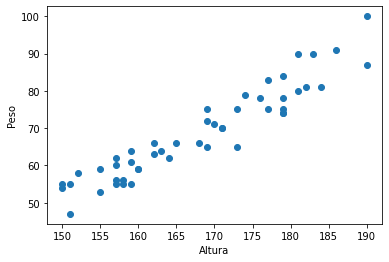

In [49]:
plt.figure(figsize=(12,5))
fig,ax=plt.subplots(1,1)
ax.scatter(data['Height'],data['Weight'])
ax.set_xlabel('Altura')
ax.set_ylabel('Peso')
plt.show()

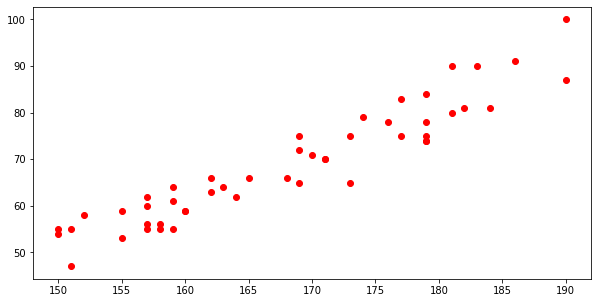

In [50]:
plt.figure(figsize=(10,5))
plt.scatter(data['Height'],data['Weight'],color='red')
plt.show()

In [12]:
data.corr()

,Height,Weight
Height,1.000000,0.942603
Weight,0.942603,1.000000


In [18]:
from sklearn import linear_model , feature_selection,preprocessing
import statsmodels.formula.api as sm
from sklearn.model_selection import train_test_split
# train_test_split sustituye a sklearn.model_selection import cross_validate
from statsmodels.tools.eval_measures import mse
from statsmodels.tools.tools import add_constant
from sklearn.metrics import mean_squared_error

In [138]:
lm=linear_model.LinearRegression()

In [151]:
modelo=lm.fit(data['Height'][:,np.newaxis],data['Weight'])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  """Entry point for launching an IPython kernel.


In [140]:
modelo1=lm.fit(X,y)

In [141]:
modelo1.intercept_

-99.27720960627336

In [152]:
modelo.intercept_

-99.2772096062735

In [153]:
modelo.coef_

array([1.00092142])

In [154]:
modelo.predict(data['Height'][:,np.newaxis])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  """Entry point for launching an IPython kernel.


array([79.88772423, 77.88588139, 64.87390296, 81.88956706, 86.89417415,
       62.87206012, 59.86929587, 55.86561019, 58.86837445, 51.86192452,
       50.8610031 , 57.86745303, 76.88495997, 63.87298154, 90.89785983,
       69.87851005, 60.87021728, 71.88035288, 65.87482438, 82.89048848,
       79.88772423, 57.86745303, 59.86929587, 51.86192452, 68.87758863,
       84.89233132, 73.88219572, 59.86929587, 81.88956706, 90.89785983,
       57.86745303, 69.87851005, 77.88588139, 71.88035288, 60.87021728,
       73.88219572, 83.8914099 , 69.87851005, 79.88772423, 50.8610031 ,
       70.87943147, 79.88772423, 58.86837445, 55.86561019, 52.86284594,
       57.86745303, 74.88311714, 62.87206012, 79.88772423])

In [155]:
pd.DataFrame(zip(data.columns,modelo.coef_),
columns = ['features', 'estimatedCoefficients'])

,features,estimatedCoefficients
0,Height,1.000921


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  This is separate from the ipykernel package so we can avoid doing imports until


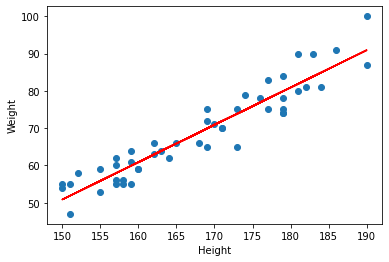

In [156]:
fig, ax = plt.subplots(1, 1)
ax.scatter(data.Height,data.Weight)
ax.plot(data.Height,modelo1.predict(data.Height[:, np.newaxis]),
color = 'red')
ax.set_xlabel('Height')
ax.set_ylabel('Weight')
plt.show()

In [157]:
modelo.predict([[110]]) # Tengo duda del pronostico, investigar mas.

array([10.82414638])

# Con statsmodels

In [158]:
data=pd.read_csv('Mens_height_weight.csv')

In [159]:
data.head()

,Height,Weight
0,179,84
1,177,83
2,164,62
3,181,90
4,186,91


In [160]:
import pandas as pd                         # Este proporciona una estructura similiar a los data.frame
import statsmodels.api as sm                # Este proporciona funciones para la estimación de muchos modelos estadísticos
import statsmodels.formula.api as smf       # Permite ajustar modelos estadísticos utilizando fórmulas de estilo R
import matplotlib.pyplot as plt             # Permite la generación de gráficos

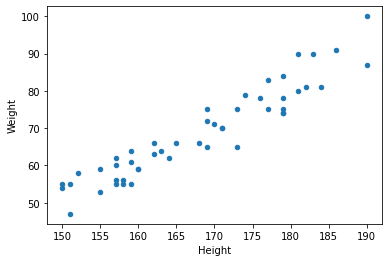

In [161]:
data.plot(kind='scatter', x='Height', y='Weight')
plt.show()

In [162]:
X = data["Height"]                           # X: usualmente significa nuestras variables de entrada (o variables independientes)
X = sm.add_constant(X)                 # Se agrega una intercepción (beta_0) al modelo
y = data["Weight"]                            # Y: normalmente significa la variable respuesta (o variable dependiente)

# Para encajar en el modelo

mod1 = sm.OLS(y, X).fit()              # sm.OLS(respuesta, entrada)
predictions = mod1.predict(X)

In [163]:
predictions

0     79.887724
1     77.885881
2     64.873903
3     81.889567
4     86.894174
5     62.872060
6     59.869296
7     55.865610
8     58.868374
9     51.861925
10    50.861003
11    57.867453
12    76.884960
13    63.872982
14    90.897860
15    69.878510
16    60.870217
17    71.880353
18    65.874824
19    82.890488
20    79.887724
21    57.867453
22    59.869296
23    51.861925
24    68.877589
25    84.892331
26    73.882196
27    59.869296
28    81.889567
29    90.897860
30    57.867453
31    69.878510
32    77.885881
33    71.880353
34    60.870217
35    73.882196
36    83.891410
37    69.878510
38    79.887724
39    50.861003
40    70.879431
41    79.887724
42    58.868374
43    55.865610
44    52.862846
45    57.867453
46    74.883117
47    62.872060
48    79.887724
dtype: float64

In [164]:
mod1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Weight   R-squared:                       0.889
Model:                            OLS   Adj. R-squared:                  0.886
Method:                 Least Squares   F-statistic:                     374.5
Date:                Mon, 15 Nov 2021   Prob (F-statistic):           5.00e-24
Time:                        21:52:04   Log-Likelihood:                -137.50
No. Observations:                  49   AIC:                             279.0
Df Residuals:                      47   BIC:                             282.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -99.2772      8.706    -11.403      0.000    -116.792     -81.762
Height         1.0009      0.052     19.353      0.000       0.897       1.105
==============================================================================
Omnibus:                        1.620   Durbin-Watson:                   1.867
Prob(Omnibus):                  0.445   Jarque-Bera (JB):                1.255
Skew:                           0.173   Prob(JB):                        0.534
Kurtosis:                       2.296   Cond. No.                     2.51e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.51e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [165]:
X

,const,Height
0,1.0,179
1,1.0,177
2,1.0,164
3,1.0,181
4,1.0,186
5,1.0,162
6,1.0,159
7,1.0,155
8,1.0,158
9,1.0,151


In [166]:
new_data=pd.DataFrame({
    'const':1,
    'Height':179
},index=['Jaime'])

In [167]:
new_data

,const,Height
Jaime,1,179


In [168]:
mod1.predict(new_data)

Jaime    79.887724
dtype: float64

# Con formulas.

In [173]:
mod2 = smf.ols('y ~ 0+X', data=data).fit()  

In [121]:
#falta probar el modelo con X por data.Height

In [174]:
print(mod2.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.889
Model:                            OLS   Adj. R-squared:                  0.886
Method:                 Least Squares   F-statistic:                     374.5
Date:                Mon, 15 Nov 2021   Prob (F-statistic):           5.00e-24
Time:                        21:53:24   Log-Likelihood:                -137.50
No. Observations:                  49   AIC:                             279.0
Df Residuals:                      47   BIC:                             282.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
X[0]         -99.2772      8.706    -11.403      0.0

In [176]:
new_data1=pd.DataFrame({
    'const':1,
    'Height':179
},index=['Jaime'])

In [178]:
#mod2.predict(new_data1)# no me da el pronostico, investigar sobre esto.

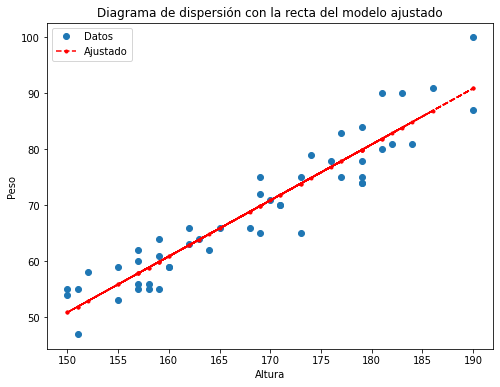

In [180]:
fig, ax = plt.subplots(figsize=(8,6))                                    # Ajuste del gráfico
ax.plot(data["Height"] , data["Weight"] , 'o', label="Datos")                         # Ajuste para las etiquetas del gráfico
ax.plot(data["Height"], mod2.fittedvalues, 'r--.', label="Ajustado")           # Ajuste para las etiquetas del gráfico
legend = ax.legend(loc="best")                                           # Ajustes para las leyendas del gráfico
plt.xlabel('Altura')                                          # Etiqueta del eje X
plt.ylabel('Peso')                                               # Etiqueta del eje Y
plt.title('Diagrama de dispersión con la recta del modelo ajustado');    # Título del gráfico
